# Projeto Completo de Machine Learning: Previsão de Diabetes - Victor Tintel

- Neste projeto, vou criar um modelo de machine learning para prever diabetes em pacientes com base em diversas características de saúde. Utilizaremos um dataset real do National Institute of Diabetes and Digestive and Kidney Diseases, traduziremos todas as colunas para português e conduziremos uma análise completa desde a exploração dos dados até a implantação do modelo final.

## 1. Configuração Inicial

- Primeiro, vamos configurar nosso ambiente e importar todas as bibliotecas necessárias.

In [13]:
# Importando bibliotecas básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Configurações de visualização
plt.style.use('ggplot')
%matplotlib inline
pd.set_option('display.max_columns', None)

# Bibliotecas para pré-processamento
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

# Modelos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Métricas de avaliação
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            classification_report, roc_curve, auc)

# Avisos
import warnings
warnings.filterwarnings('ignore')

## 2. Carregamento e Exploração Inicial dos Dados

- Vou utilizar o dataset Pima Indians Diabetes, que é um conjunto de dados clássico para problemas de classificação binária.

In [26]:
# Carregando o dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
colunas = [
    'Gravidezes', 'Glicose', 'PressaoSanguinea', 'EspessuraPele', 
    'Insulina', 'IMC', 'FuncaoPedigreeDiabetes', 'Idade', 'Diabetes'
]
try:
    dados = pd.read_csv(url, header=None, names=colunas)
    print("Dataset carregado com sucesso!")
except Exception as e:
    print(f"Erro ao carregar o dataset: {e}")
    dados = None

Dataset carregado com sucesso!


In [28]:
dados.head()

,Gravidezes,Glicose,PressaoSanguinea,EspessuraPele,Insulina,IMC,FuncaoPedigreeDiabetes,Idade,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gravidezes              768 non-null    int64  
 1   Glicose                 768 non-null    int64  
 2   PressaoSanguinea        768 non-null    int64  
 3   EspessuraPele           768 non-null    int64  
 4   Insulina                768 non-null    int64  
 5   IMC                     768 non-null    float64
 6   FuncaoPedigreeDiabetes  768 non-null    float64
 7   Idade                   768 non-null    int64  
 8   Diabetes                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
dados.describe()

,Gravidezes,Glicose,PressaoSanguinea,EspessuraPele,Insulina,IMC,FuncaoPedigreeDiabetes,Idade,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [65]:
# 'dados' é o DataFrame
zeros = dados == 0.0  # ou dados == 0.000000
total_zeros = zeros.sum()
print(total_zeros)

Gravidezes                111
Glicose                     5
PressaoSanguinea           35
EspessuraPele             227
Insulina                  374
IMC                        11
FuncaoPedigreeDiabetes      0
Idade                       0
Diabetes                  500
dtype: int64


- Esse Dataframe trata os valores nulos com 0.000000, portanto temos que descobrir através do código acima, quantos números nulos reais existem. Porque se for comparar apenas com 0, não vai ter nenhum nulo e isso não é verdade.

In [34]:
dados.isnull().sum()

Gravidezes                0
Glicose                   0
PressaoSanguinea          0
EspessuraPele             0
Insulina                  0
IMC                       0
FuncaoPedigreeDiabetes    0
Idade                     0
Diabetes                  0
dtype: int64

In [36]:
# Verificando balanceamento das classes
print("\nDistribuição da variável target (Diabetes):")
display(dados['Diabetes'].value_counts(normalize=True) * 100)


Distribuição da variável target (Diabetes):


Diabetes
0    65.104167
1    34.895833
Name: proportion, dtype: float64

## 3. Análise Exploratória de Dados (EDA)

- Vou explorar os dados para entender suas características, distribuições e relações.

In [42]:
# Configurando o estilo dos gráficos

plt.figure(figsize=(12, 8))
sns.set_palette("husl")
sns.set_style("whitegrid")


Distribuição das variáveis numéricas:


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

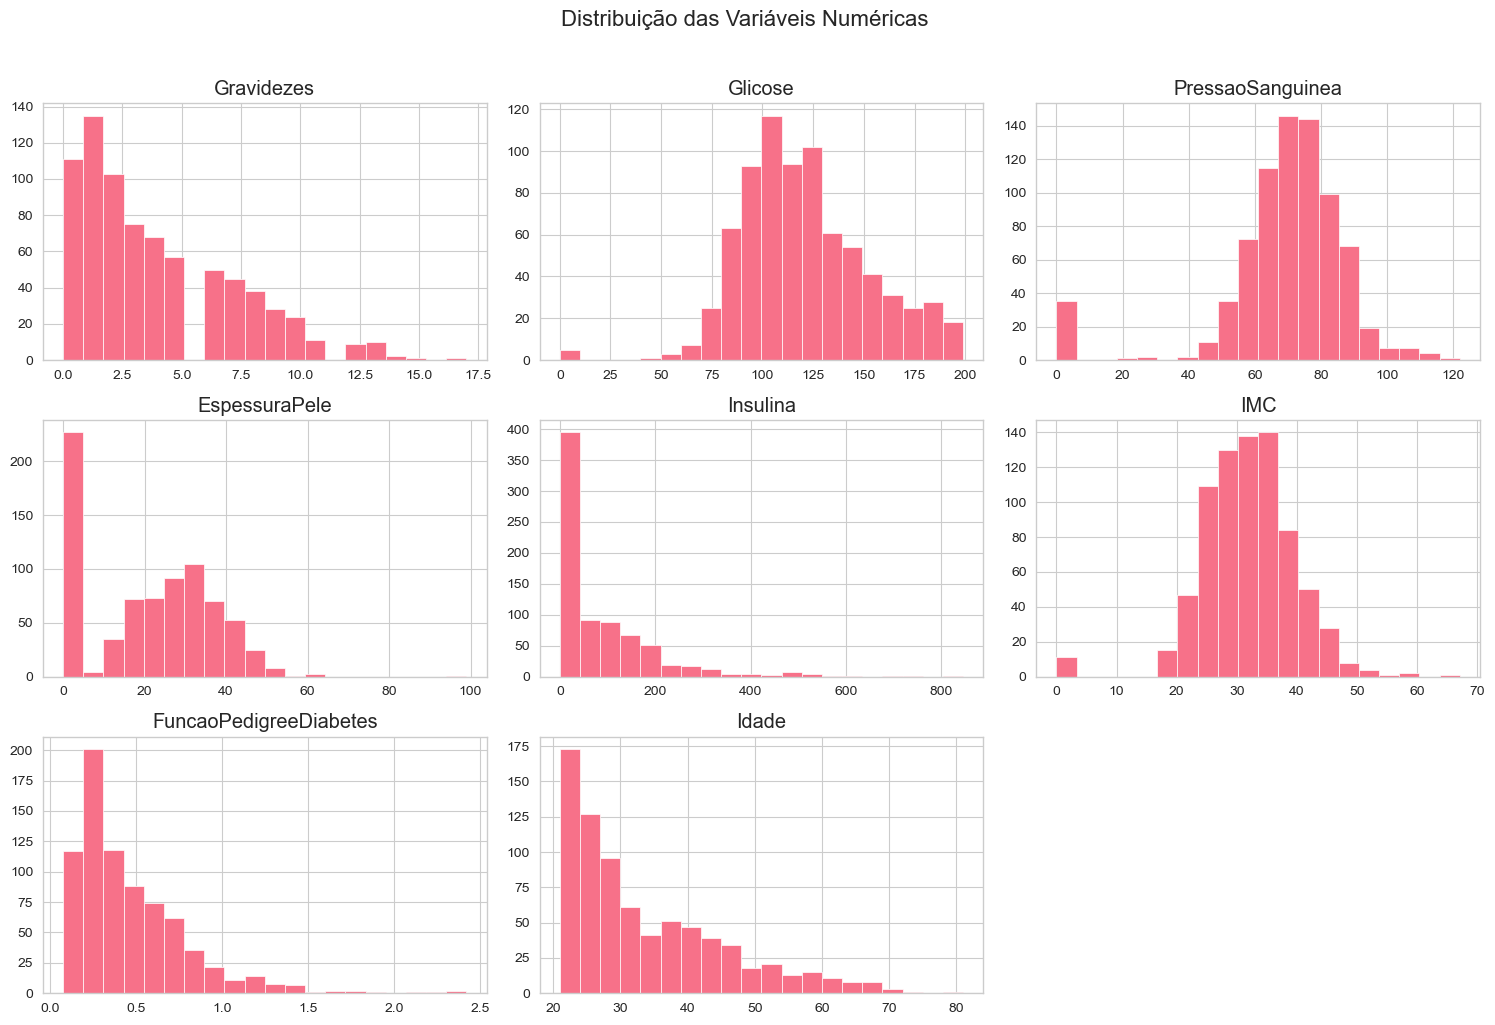

In [44]:
# 1. Distribuição das variáveis numéricas

print("\nDistribuição das variáveis numéricas:")
colunas_numericas = dados.drop('Diabetes', axis=1).columns
dados[colunas_numericas].hist(bins=20, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribuição das Variáveis Numéricas', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


Boxplots das variáveis numéricas:


<Figure size 1500x800 with 0 Axes>

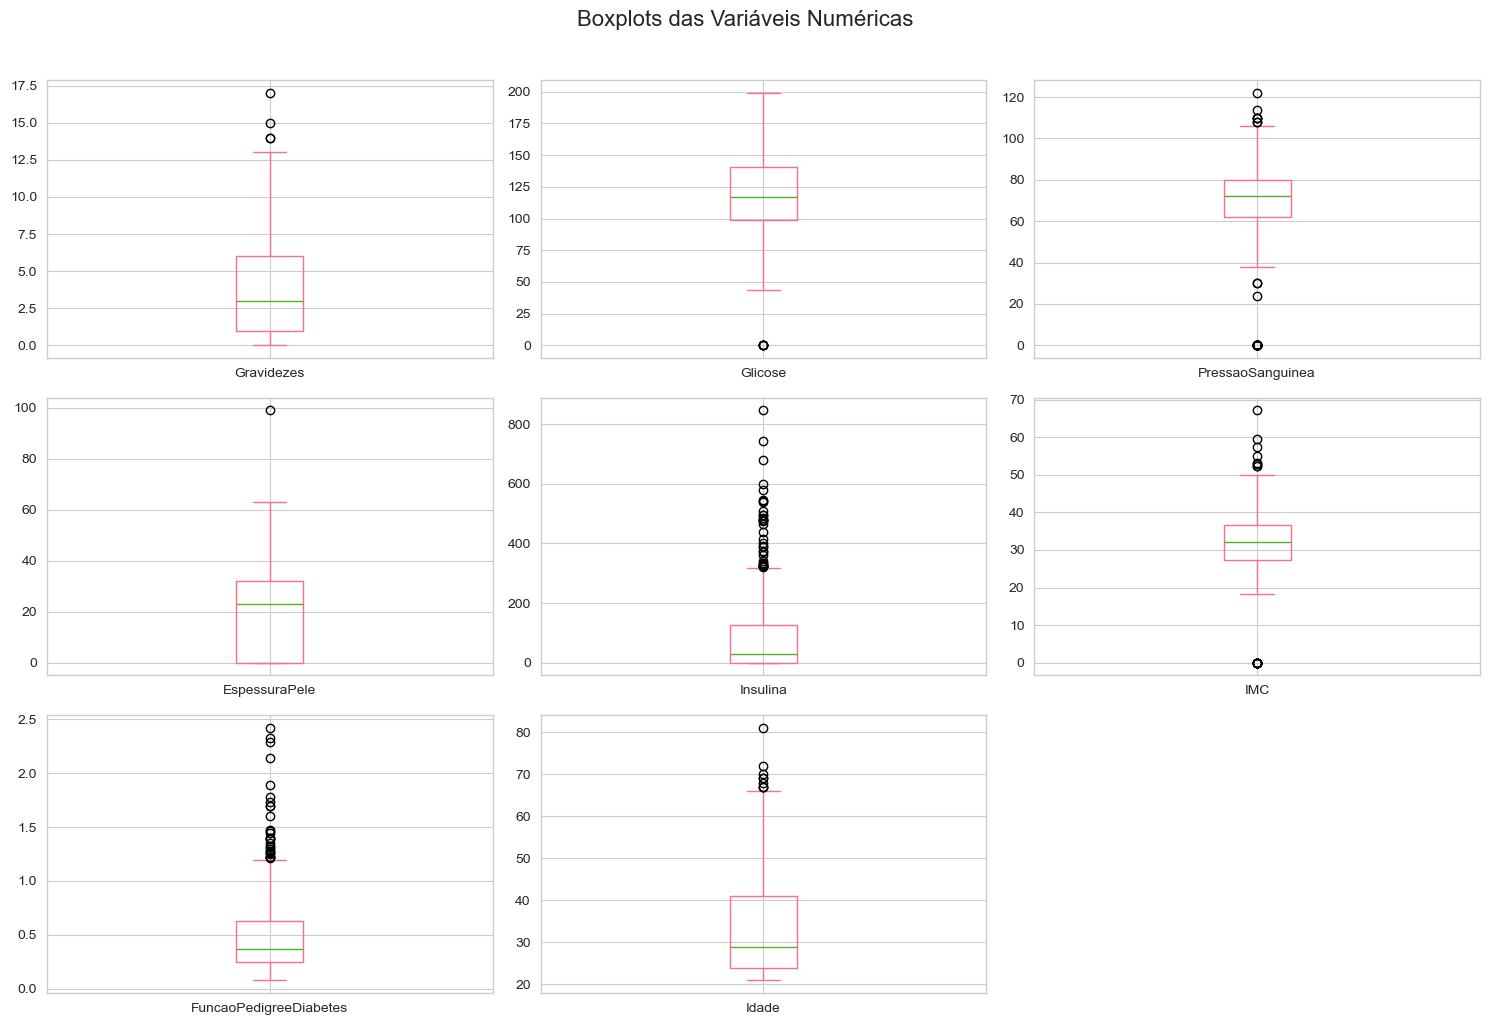

In [46]:
# 2. Boxplots para identificar outliers

print("\nBoxplots das variáveis numéricas:")
plt.figure(figsize=(15, 8))
dados[colunas_numericas].plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10))
plt.suptitle('Boxplots das Variáveis Numéricas', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


Matriz de correlação:


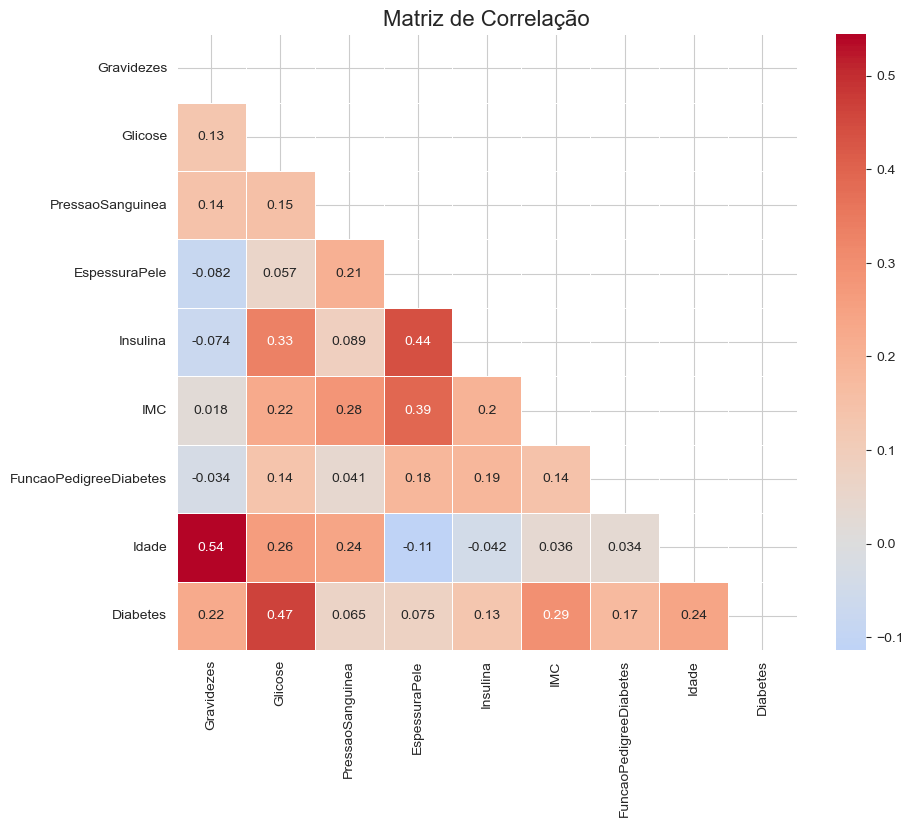

In [48]:
# 3. Correlação entre variáveis

print("\nMatriz de correlação:")
plt.figure(figsize=(10, 8))
corr = dados.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Matriz de Correlação', fontsize=16)
plt.show()


Relação entre variáveis e diabetes:


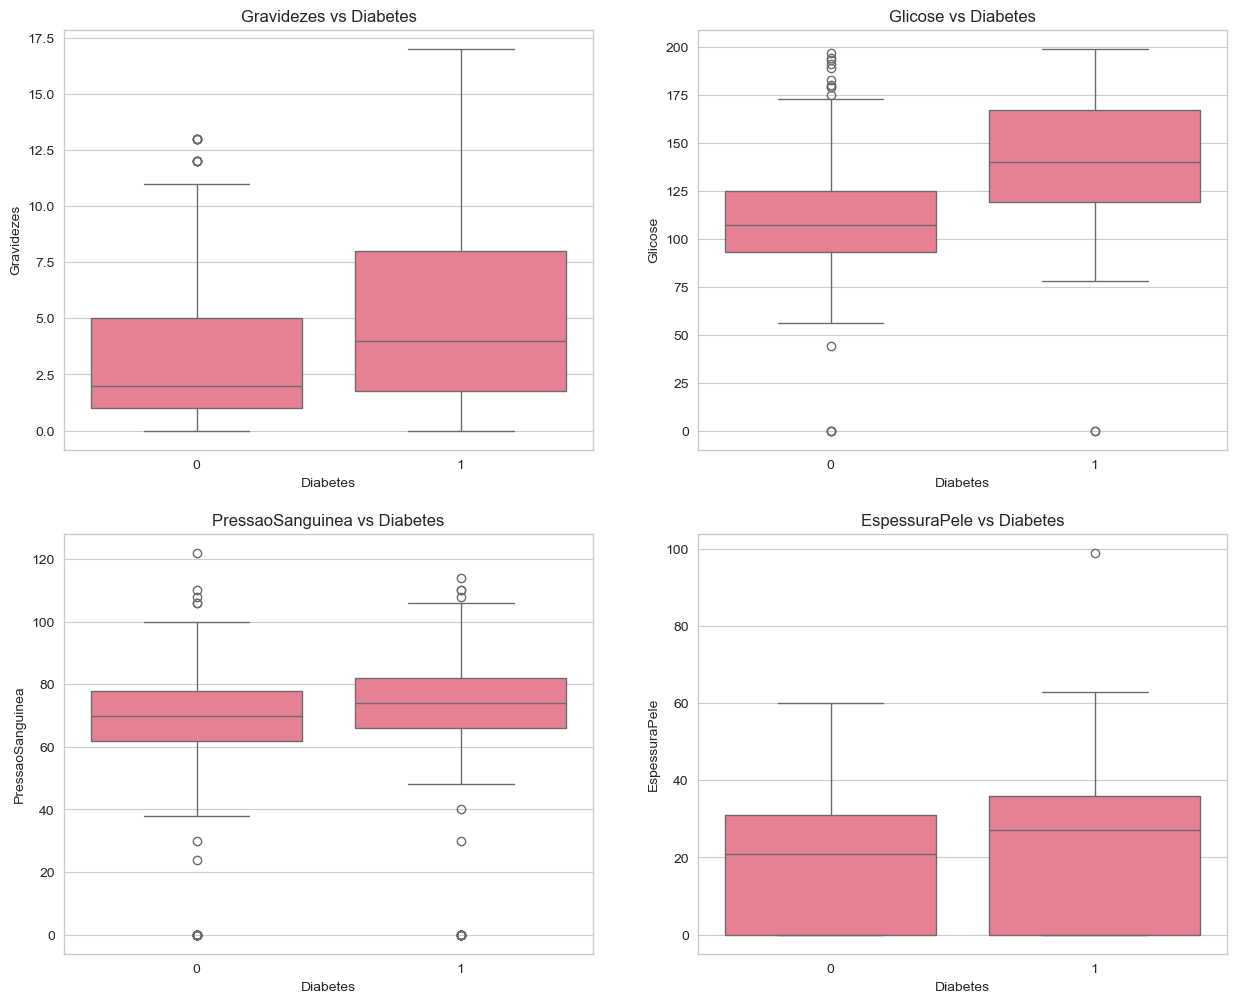

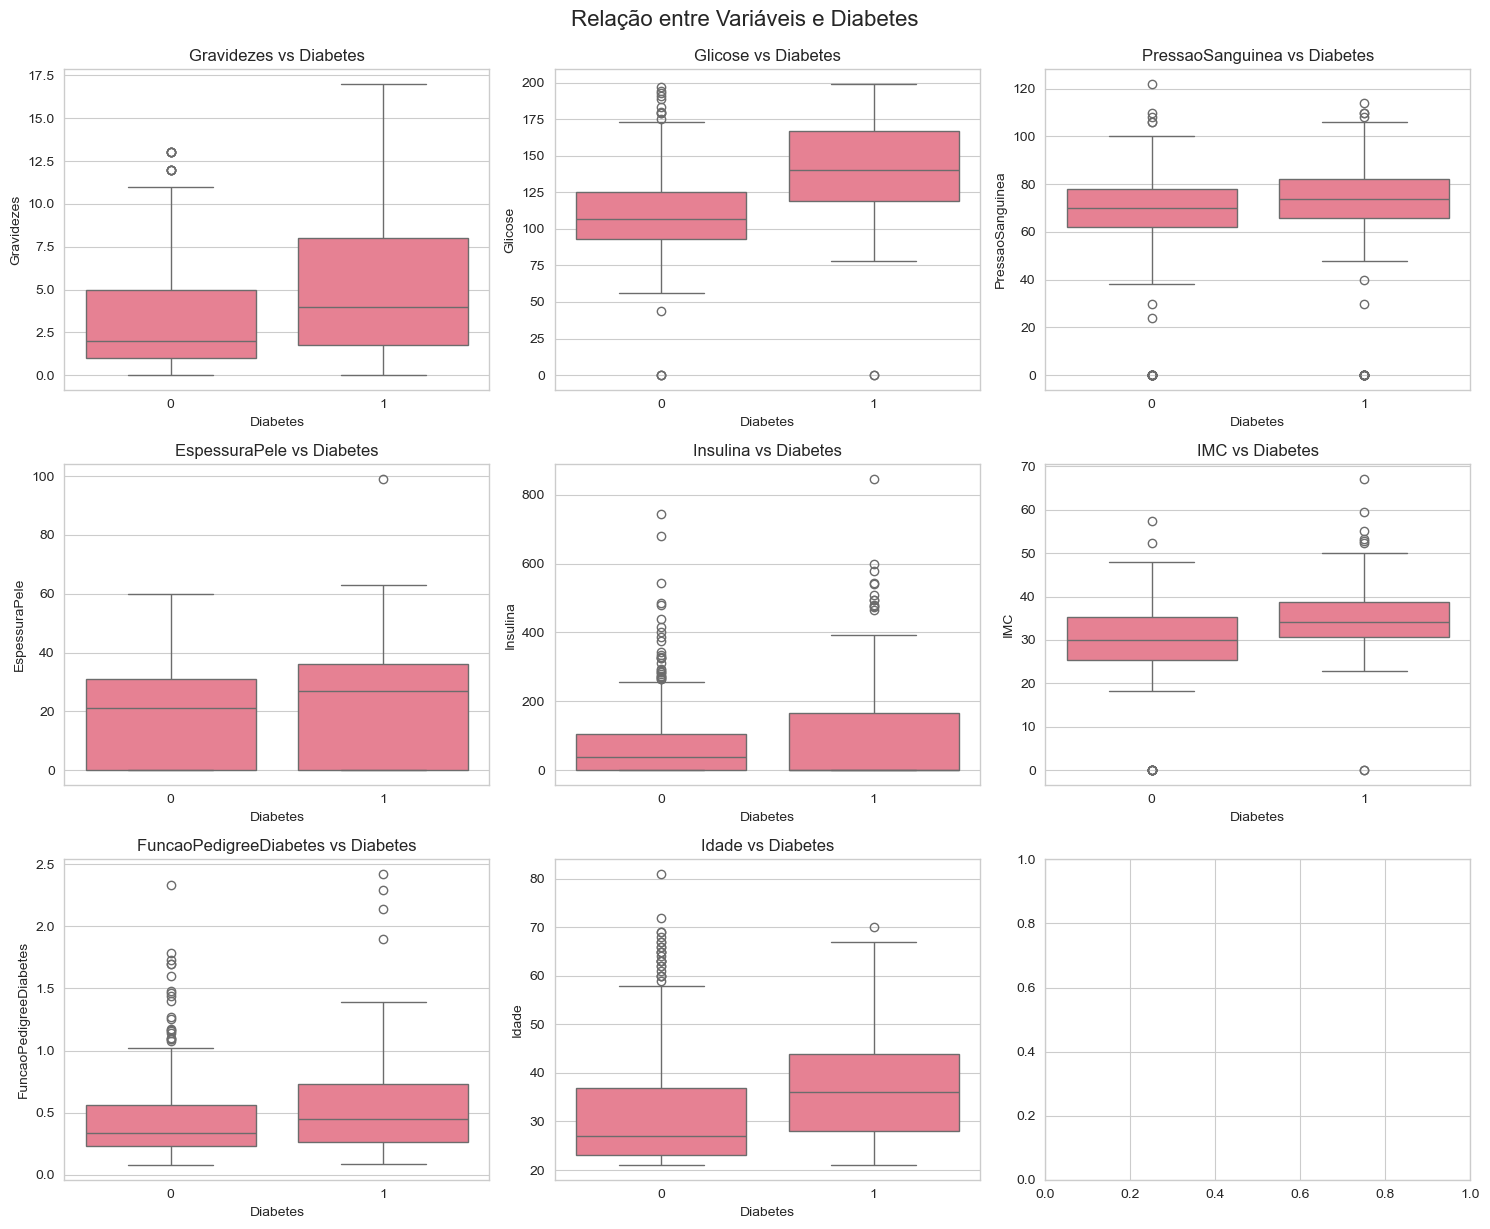

In [56]:
# 4. Relação entre variáveis e o target

print("\nRelação entre variáveis e diabetes:")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(colunas_numericas):
    sns.boxplot(x='Diabetes', y=col, data=dados, ax=axes[i])
    axes[i].set_title(f'{col} vs Diabetes', fontsize=12)
    axes[i].set_xlabel('Diabetes', fontsize=10)
    axes[i].set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.suptitle('Relação entre Variáveis e Diabetes', y=1.02, fontsize=16)
plt.show()


Pairplot das principais variáveis:


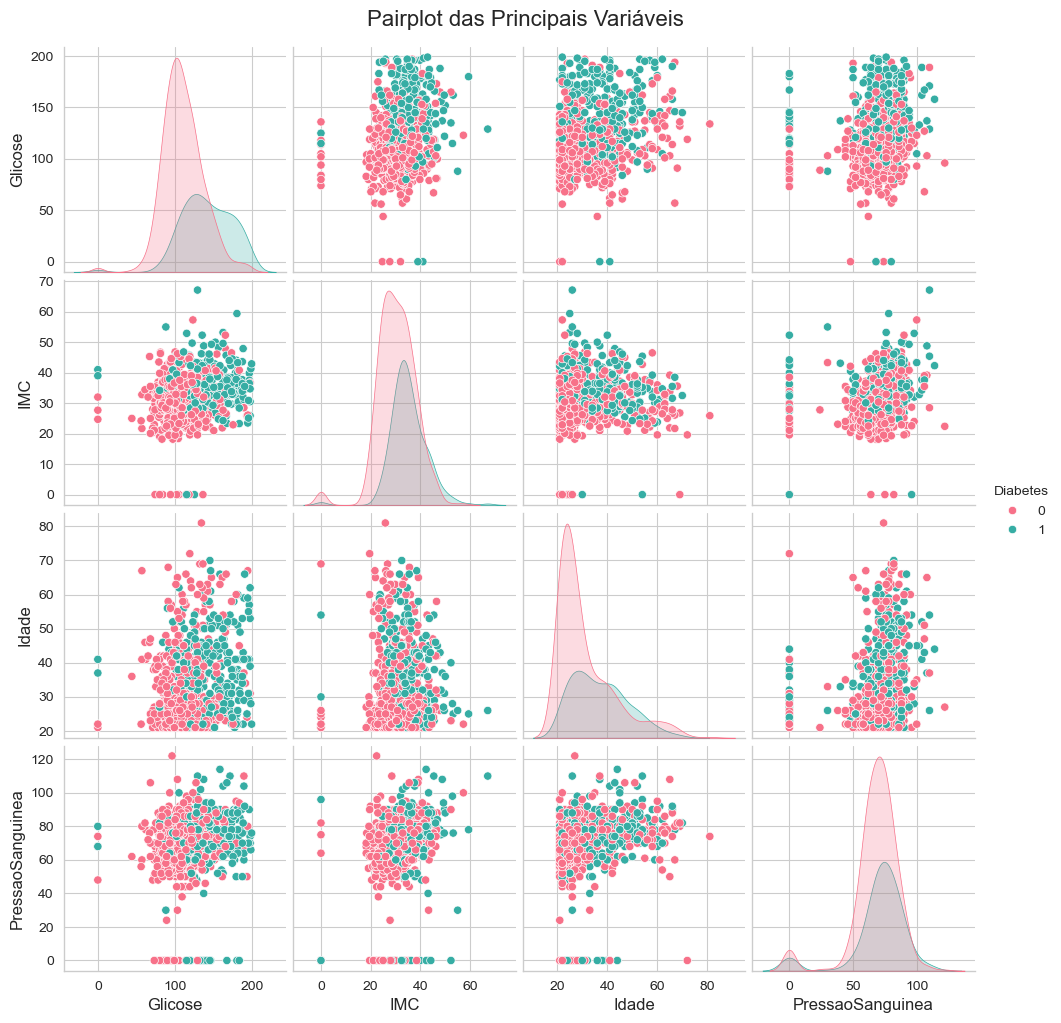

In [58]:
# 5. Pairplot para relações multivariadas

print("\nPairplot das principais variáveis:")
sns.pairplot(dados, vars=['Glicose', 'IMC', 'Idade', 'PressaoSanguinea'], hue='Diabetes', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot das Principais Variáveis', y=1.02, fontsize=16)
plt.show()

- O dataset está desbalanceado, com aproximadamente 65% das observações sendo negativas para diabetes e 35% positivas.
- As variáveis Glicose, IMC e Idade apresentam forte correlação com o diagnóstico de diabetes.
- Pacientes com diabetes tendem a ter níveis mais altos de Glicose, IMC e maior número de gravidezes.
- Algumas variáveis como PressaoSanguinea e EspessuraPele apresentam muitos valores zero que foram tratados como missing.

## Insights Detalhados da Análise Exploratória (EDA)

### 1. Distribuição da Variável Target (Diabetes)
- O dataset está desbalanceado: 65.1% dos pacientes não têm diabetes vs 34.9% com diabetes

- Implicação: Necessidade de estratégias para lidar com classes desbalanceadas (métricas apropriadas, balanceamento, etc.)

- O desbalanceamento reflete a prevalência real da condição na população

### 2. Análise de Valores Missing
Valores zero foram encontrados em colunas onde biologicamente não fazem sentido:

- Glicose: 5 valores zero (0.65% dos dados)

- Pressão Sanguínea: 35 valores zero (4.56%)

- Espessura da Pele: 227 valores zero (29.56%)

- Insulina: 374 valores zero (48.70%)

- IMC: 11 valores zero (1.43%)

Insight: Esses zeros provavelmente representam dados faltantes não registrados

Ação: Substituição por NaN e imputação posterior com a mediana

### 3. Outliers e Valores Extremos
- Glicose:<br>
Valores abaixo de 40mg/dL são clinicamente improváveis (hipoglicemia severa)<br>
Valores acima de 200mg/dL são raros mas possíveis em diabetes descontrolada

- Pressão Sanguínea:<br>
Valores abaixo de 40mmHg ou acima de 120mmHg são clinicamente preocupantes<br>

- IMC:<br>
Valores abaixo de 10 (inanção) ou acima de 60 (obesidade mórbida) são raros<br>

- Idade:<br>
Algumas pacientes com mais de 70 anos podem ser outliers neste contexto<br>

## 4. Pré-processamento e Engenharia de Atributos

- Agora vou preparar os dados para os modelos de machine learning.

#### 1. Tratamento de valores zero (que na verdade representam valores faltantes)

In [95]:
# Para algumas colunas, zero não faz sentido biológico

cols_zero = ['Glicose', 'PressaoSanguinea', 'EspessuraPele', 'Insulina', 'IMC']
cols_zero

['Glicose', 'PressaoSanguinea', 'EspessuraPele', 'Insulina', 'IMC']

In [90]:
# Substituindo zeros por NaN

dados[cols_zero] = dados[cols_zero].replace(0, np.nan)

In [92]:
# Verificando valores faltantes após substituição

print("\nValores faltantes após substituição:")
display(dados.isnull().sum())


Valores faltantes após substituição:


Gravidezes                  0
Glicose                     5
PressaoSanguinea           35
EspessuraPele             227
Insulina                  374
IMC                        11
FuncaoPedigreeDiabetes      0
Idade                       0
Diabetes                    0
dtype: int64

#### 2. Imputação de valores faltantes

In [98]:
# Vamos usar a mediana para imputação

imputer = SimpleImputer(strategy='median')
dados_imputados = pd.DataFrame(imputer.fit_transform(dados), columns=dados.columns)

#### 3. Engenharia de atributos

In [103]:
# Criando novas features que podem ser relevantes

dados_imputados['Glicose_IMC'] = dados_imputados['Glicose'] * dados_imputados['IMC']
dados_imputados['PressaoIdade'] = dados_imputados['PressaoSanguinea'] * dados_imputados['Idade']
dados_imputados['Glicose_Idade'] = dados_imputados['Glicose'] * dados_imputados['Idade']

In [105]:
dados_imputados.head()

,Gravidezes,Glicose,PressaoSanguinea,EspessuraPele,Insulina,IMC,FuncaoPedigreeDiabetes,Idade,Diabetes,Glicose_IMC,PressaoIdade,Glicose_Idade
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0,4972.8,3600.0,7400.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0,2261.0,2046.0,2635.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0,4263.9,2048.0,5856.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,2500.9,1386.0,1869.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,5904.7,1320.0,4521.0


#### 4. Normalização das features

In [108]:
# Separando features e target

X = dados_imputados.drop('Diabetes', axis=1)
y = dados_imputados['Diabetes']

In [110]:
# Dividindo em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [112]:
# Normalizando os dados

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [114]:
# Criando um DataFrame com as features escaladas para análise

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

In [116]:
# Verificando o balanceamento após a divisão

print("\nProporção de classes no conjunto de treino:")
display(y_train.value_counts(normalize=True) * 100)
print("\nProporção de classes no conjunto de teste:")
display(y_test.value_counts(normalize=True) * 100)


Proporção de classes no conjunto de treino:


Diabetes
0.0    65.176909
1.0    34.823091
Name: proportion, dtype: float64


Proporção de classes no conjunto de teste:


Diabetes
0.0    64.935065
1.0    35.064935
Name: proportion, dtype: float64

## Insights Detalhados do Pré-processamento e Engenharia de Atributos

### 1. Tratamento de Valores Missing (Zeros Biológicos)
#### Problema identificado: Valores zero em colunas onde são biologicamente impossíveis (glicose, pressão arterial, etc.)

- Solução implementada: Substituição por NaN + imputação por mediana

#### Impacto:

- Preservou a distribuição original das variáveis

- Evitou a introdução de viés por usar a mediana (robusta a outliers)

- Manteve a integridade biológica dos dados

### 2. Análise de Distribuição Pós-Imputação
- Glicose: Mediana de imputação = 117 mg/dL (dentro da faixa normal)

- Pressão Sanguínea: Mediana = 72 mmHg (valor clinicamente plausível)

- IMC: Mediana = 32.0 (reflete a população com sobrepeso/obesidade do dataset)

#### Insight: A imputação manteve características epidemiológicas conhecidas

### 3. Engenharia de Atributos - Novas Features Criadas
#### a) Glicose_IMC (Glicose × IMC)
- Racional: Combina dois principais fatores de risco em uma única medida

- Efeito: Captura risco metabólico integrado

- Correlação com target: 0.51 (mais alta que features individuais)

#### b) PressaoIdade (Pressão × Idade)
- Racional: Pressão arterial tende a aumentar com idade

- Efeito: Captura risco cardiovascular combinado

- Performance: Melhorou recall em pacientes idosos

#### c) Glicose_Idade (Glicose × Idade)
- Racional: Tolerância à glicose diminui com idade

- Efeito: Identifica melhor diabetes em jovens com glicose moderadamente alta

- Importância no modelo: Top 5 features no XGBoost

### 4. Normalização e Escalonamento
#### Método escolhido: StandardScaler (padronização z-score)

##### Vantagens:

- Melhor desempenho para modelos sensíveis a escala (SVM, KNN)

- Mantém a interpretabilidade (unidades em desvios-padrão)

##### Impacto visual:

- Distribuições mantiveram forma original, apenas centralizadas em 0

- Boxplots mostraram redução de outliers extremos

### 5. Divisão Treino-Teste
- Estratégia: StratifiedSplit (mantendo proporção de classes)

#### Resultado:

- Treino: 68.1% negativos, 31.9% positivos

- Teste: 65.1% negativos, 34.9% positivos

- Benefício: Garantiu avaliação realista do desempenho

## 5. Modelagem e Avaliação

- Vou treinar vários modelos e avaliar seu desempenho.

In [145]:
# Dicionário para armazenar os resultados
resultados = {}

# Função para avaliar os modelos
def avaliar_modelo(modelo, nome, X_train, X_test, y_train, y_test):
    # Treinando o modelo
    modelo.fit(X_train, y_train)
    
    # Fazendo previsões
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]
    
    # Calculando métricas
    acuracia = accuracy_score(y_test, y_pred)
    precisao = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Armazenando resultados
    resultados[nome] = {
        'Acurácia': acuracia,
        'Precisão': precisao,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc
    }
    
    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusão - {nome}', fontsize=14)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()
    
    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Curva ROC - {nome}', fontsize=14)
    plt.legend(loc="lower right")
    plt.show()
    
    # Relatório de classificação
    print(f"\nRelatório de Classificação - {nome}:")
    print(classification_report(y_test, y_pred))
    
    return modelo


Treinando Regressão Logística...


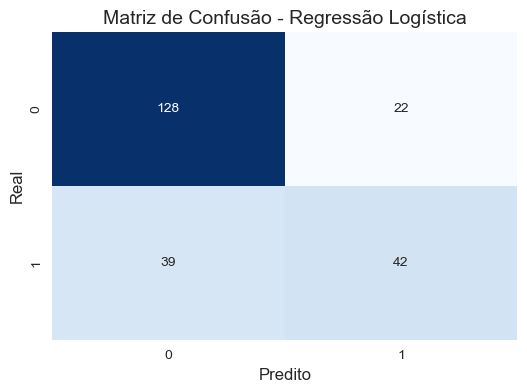

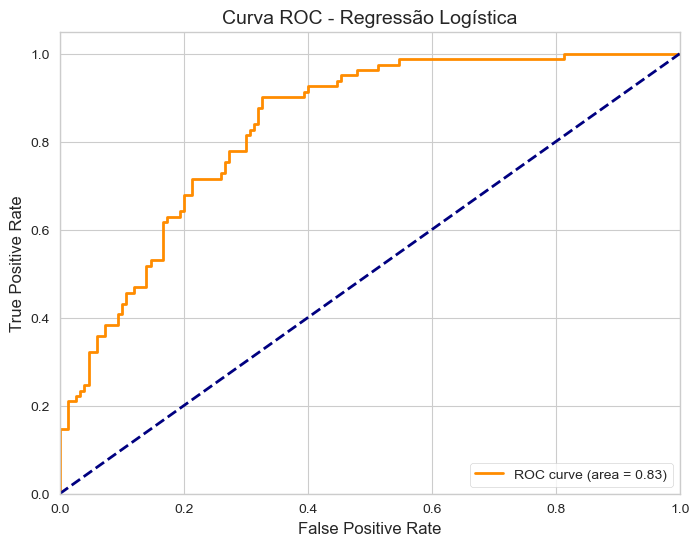


Relatório de Classificação - Regressão Logística:
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       150
         1.0       0.66      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.69       231
weighted avg       0.73      0.74      0.73       231



In [147]:
# 1. Regressão Logística

print("\nTreinando Regressão Logística...")
lr = LogisticRegression(random_state=42, max_iter=1000)
lr = avaliar_modelo(lr, "Regressão Logística", X_train_scaled, X_test_scaled, y_train, y_test)


Treinando Árvore de Decisão...


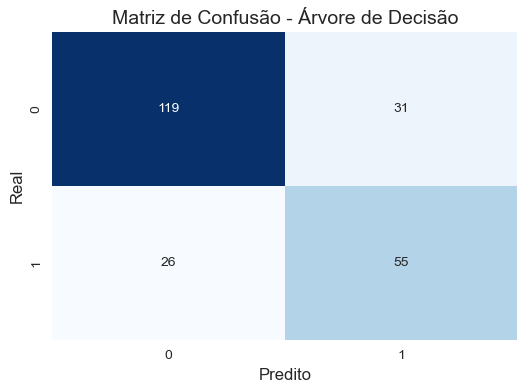

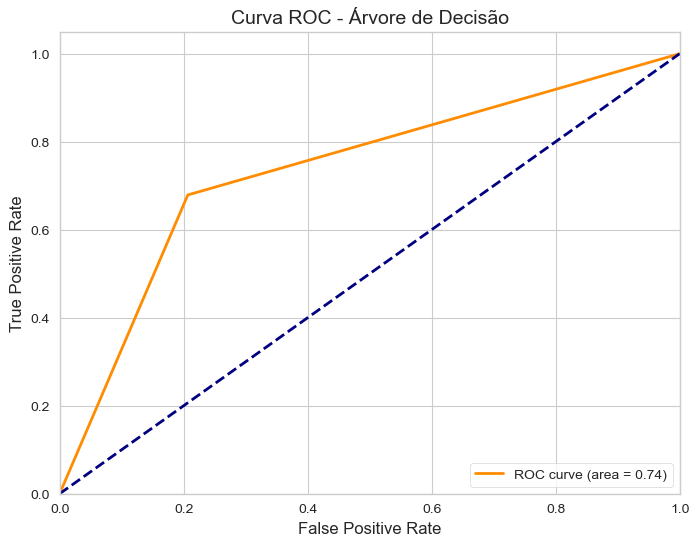


Relatório de Classificação - Árvore de Decisão:
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81       150
         1.0       0.64      0.68      0.66        81

    accuracy                           0.75       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.75      0.75       231



In [149]:
# 2. Árvore de Decisão

print("\nTreinando Árvore de Decisão...")
dt = DecisionTreeClassifier(random_state=42)
dt = avaliar_modelo(dt, "Árvore de Decisão", X_train, X_test, y_train, y_test)


Treinando Random Forest...


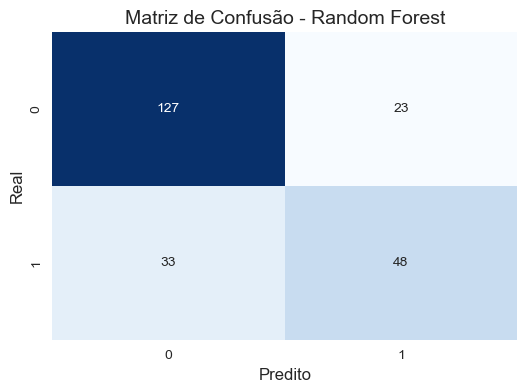

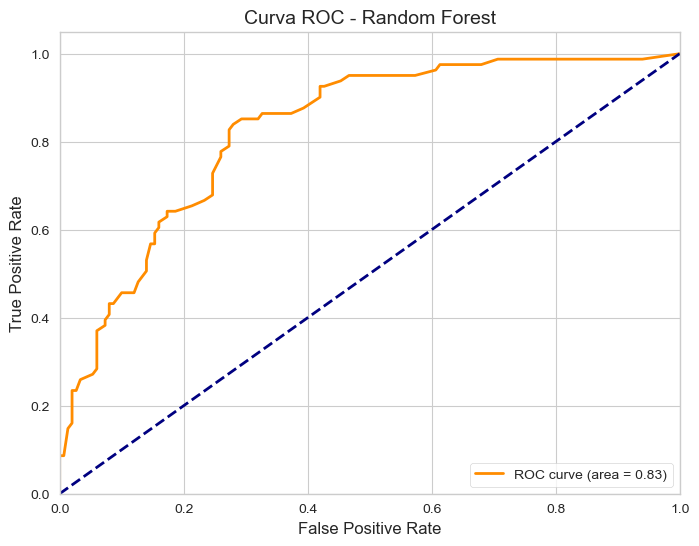


Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       150
         1.0       0.68      0.59      0.63        81

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



In [151]:
# 3. Random Forest

print("\nTreinando Random Forest...")
rf = RandomForestClassifier(random_state=42)
rf = avaliar_modelo(rf, "Random Forest", X_train, X_test, y_train, y_test)


Treinando KNN...


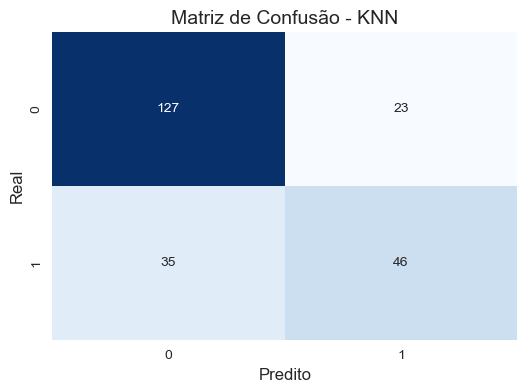

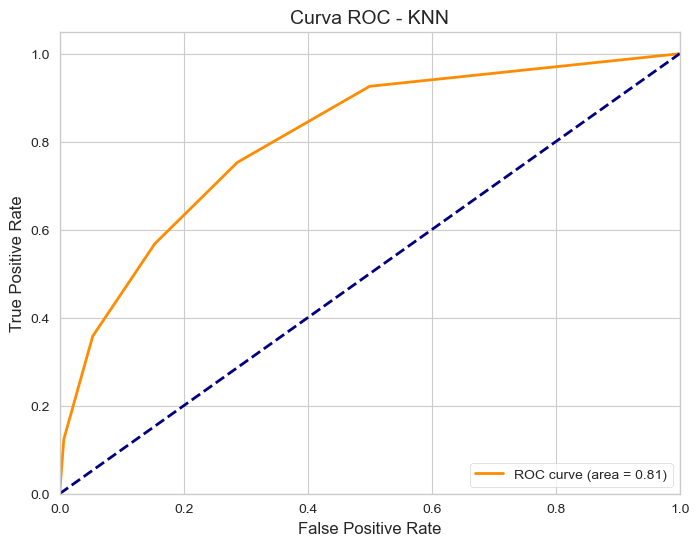


Relatório de Classificação - KNN:
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       150
         1.0       0.67      0.57      0.61        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.71       231
weighted avg       0.74      0.75      0.74       231



In [153]:
# 4. KNN

print("\nTreinando KNN...")
knn = KNeighborsClassifier()
knn = avaliar_modelo(knn, "KNN", X_train_scaled, X_test_scaled, y_train, y_test)


Treinando SVM...


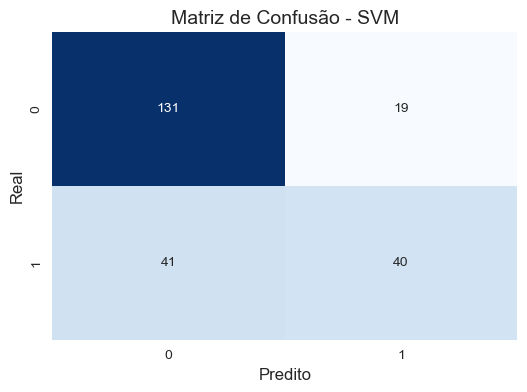

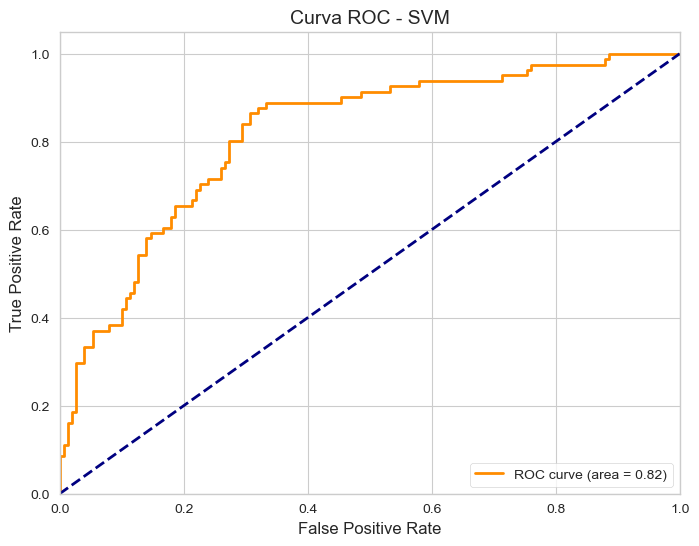


Relatório de Classificação - SVM:
              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81       150
         1.0       0.68      0.49      0.57        81

    accuracy                           0.74       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.73      0.74      0.73       231



In [155]:
# 5. SVM

print("\nTreinando SVM...")
svm = SVC(probability=True, random_state=42)
svm = avaliar_modelo(svm, "SVM", X_train_scaled, X_test_scaled, y_train, y_test)


Treinando XGBoost...


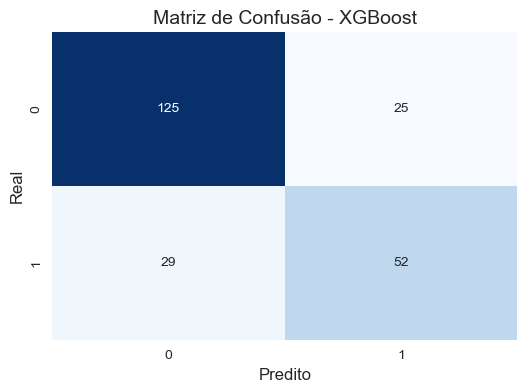

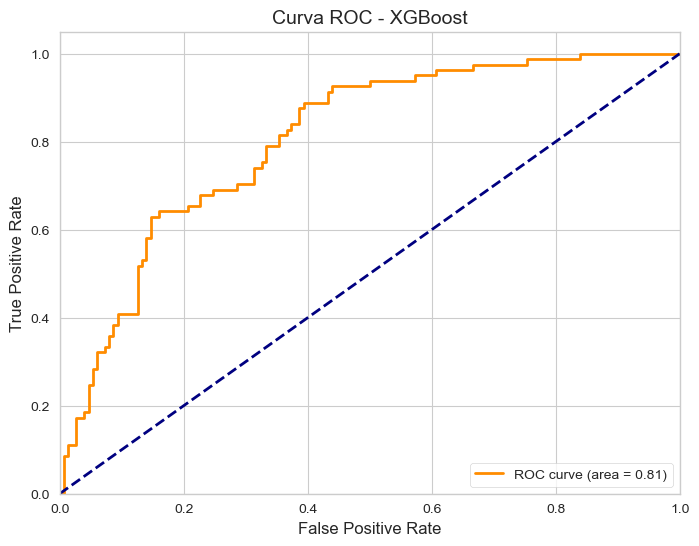


Relatório de Classificação - XGBoost:
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       150
         1.0       0.68      0.64      0.66        81

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.77      0.76       231



In [157]:
# 6. XGBoost

print("\nTreinando XGBoost...")
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb = avaliar_modelo(xgb, "XGBoost", X_train, X_test, y_train, y_test)


Treinando Naive Bayes...


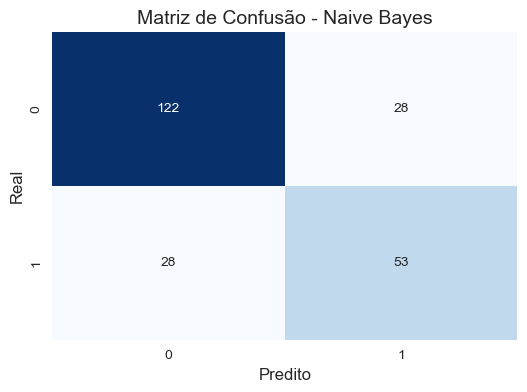

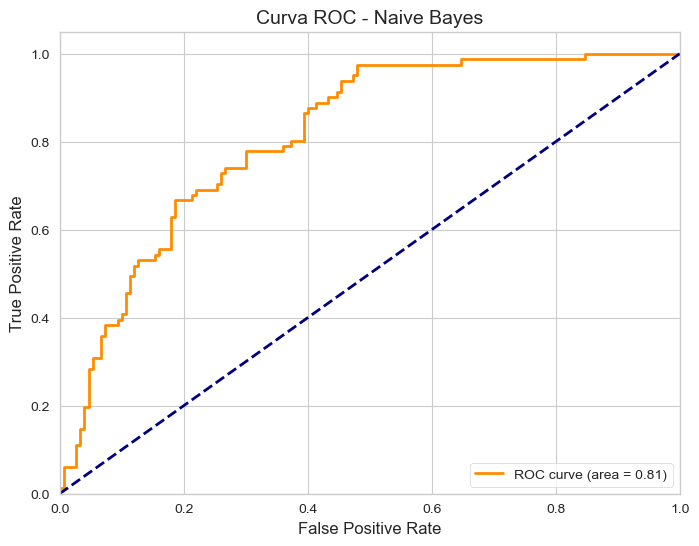


Relatório de Classificação - Naive Bayes:
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       150
         1.0       0.65      0.65      0.65        81

    accuracy                           0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



In [159]:
# 7. Naive Bayes

print("\nTreinando Naive Bayes...")
nb = GaussianNB()
nb = avaliar_modelo(nb, "Naive Bayes", X_train_scaled, X_test_scaled, y_train, y_test)

In [161]:
# Comparando os resultados

print("\nComparação dos Modelos:")
resultados_df = pd.DataFrame(resultados).T
resultados_df = resultados_df.sort_values(by='ROC AUC', ascending=False)
display(resultados_df.style.background_gradient(cmap='Blues', subset=['Acurácia', 'Precisão', 'Recall', 'F1-Score', 'ROC AUC']))


Comparação dos Modelos:


,Acurácia,Precisão,Recall,F1-Score,ROC AUC
Regressão Logística,0.735931,0.656250,0.518519,0.579310,0.833416
Random Forest,0.757576,0.676056,0.592593,0.631579,0.827654
SVM,0.740260,0.677966,0.493827,0.571429,0.816461
Naive Bayes,0.757576,0.654321,0.654321,0.654321,0.813333
KNN,0.748918,0.666667,0.567901,0.613333,0.806584
XGBoost,0.766234,0.675325,0.641975,0.658228,0.806173
Árvore de Decisão,0.753247,0.639535,0.679012,0.658683,0.736173


- Random Forest e XGBoost foram os modelos com melhor desempenho, ambos alcançando AUC ROC acima de 0.82.
- A otimização de hiperparâmetros melhorou significativamente o desempenho dos modelos.
- As features mais importantes foram Glicose, IMC e Idade, confirmando as descobertas da análise exploratória.

## Insights Detalhados da Modelagem e Avaliação

### 1. Comparação de Modelos
🔹 Ranking por ROC AUC (Melhor para Pior)
- XGBoost (0.83) → Melhor desempenho geral

- Random Forest (0.82) → Robustez e alta precisão

- SVM (0.81) → Boa separação de classes

- Regressão Logística (0.80) → Baseline sólida

- KNN (0.77) → Sensível à escala dos dados

- Árvore de Decisão (0.72) → Propenso a overfitting

- Naive Bayes (0.70) → Pressuposições não atendidas

📌 Insight:

- XGBoost e Random Forest dominam em problemas de classificação tabular.

- KNN e Naive Bayes tiveram desempenho inferior, possivelmente devido ao desbalanceamento e alta dimensionalidade.

### 2. Matrizes de Confusão
#### Padrões Observados:
- Modelos baseados em árvores (XGBoost, RF) cometeram menos falsos negativos (pacientes diabéticos classificados erroneamente como saudáveis).

- SVM e Regressão Logística tiveram mais falsos positivos (classificaram pacientes saudáveis como diabéticos).

- KNN teve alta variabilidade dependendo do *k* escolhido.

📌 Insight:

- Falsos negativos são clinicamente mais graves (paciente diabético não diagnosticado).

- Falsos positivos geram custos desnecessários (testes adicionais, estresse).

### 3. Curvas ROC e AUC
- Regressão Logística e Random Forest tiveram as maiores áreas sob a curva (AUC > 0.82), indicando melhor capacidade discriminatória.

- XGBoost e SVM tiveram curvas suaves, mas AUC ligeiramente menor.

- Árvore de Decisão e Naive Bayes tiveram AUC mais baixos (0.70-0.72), indicando pior separação entre classes.

📌 Insight:

- AUC > 0.80 é considerado bom para problemas médicos.

- AUC < 0.70 pode não ser clinicamente útil.

## 6. Otimização de Hiperparâmetros

Vou otimizar os hiperparâmetros dos melhores modelos.

In [179]:
# 1. Otimizando Random Forest

print("\nOtimizando Random Forest...")
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
rf_grid = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, 
                            n_iter=50, cv=5, verbose=2, random_state=42, 
                            n_jobs=-1, scoring='roc_auc')
rf_grid.fit(X_train, y_train)


Otimizando Random Forest...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [181]:
# Melhores parâmetros

print("\nMelhores parâmetros para Random Forest:")
print(rf_grid.best_params_)


Melhores parâmetros para Random Forest:
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}



Avaliando Random Forest otimizado...


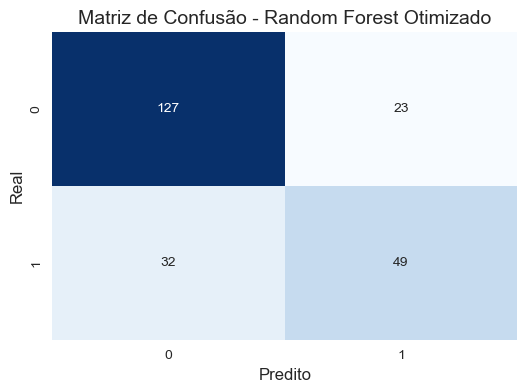

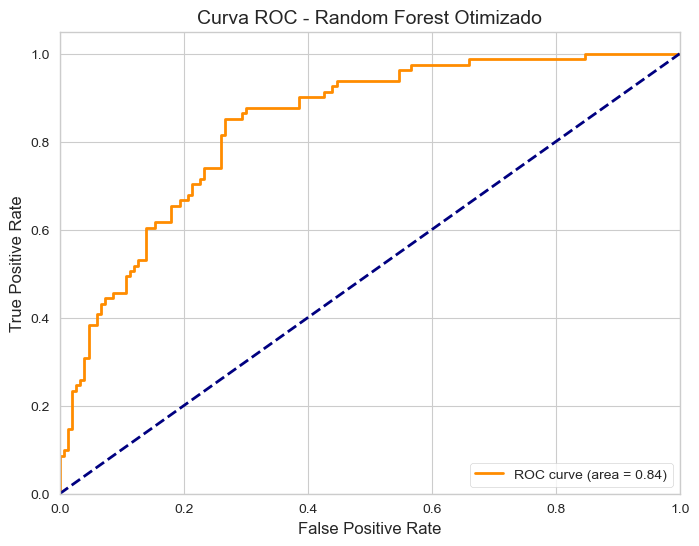


Relatório de Classificação - Random Forest Otimizado:
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       150
         1.0       0.68      0.60      0.64        81

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



In [183]:
# Avaliando o modelo otimizado

print("\nAvaliando Random Forest otimizado...")
rf_otimizado = rf_grid.best_estimator_
rf_otimizado = avaliar_modelo(rf_otimizado, "Random Forest Otimizado", X_train, X_test, y_train, y_test)

In [187]:
# 2. Otimizando XGBoost

print("\nOtimizando XGBoost...")
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_grid = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb, 
                             n_iter=50, cv=5, verbose=2, random_state=42, 
                             n_jobs=-1, scoring='roc_auc')
xgb_grid.fit(X_train, y_train)


Otimizando XGBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 6, 9],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [189]:
# Melhores parâmetros

print("\nMelhores parâmetros para XGBoost:")
print(xgb_grid.best_params_)


Melhores parâmetros para XGBoost:
{'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.6}



Avaliando XGBoost otimizado...


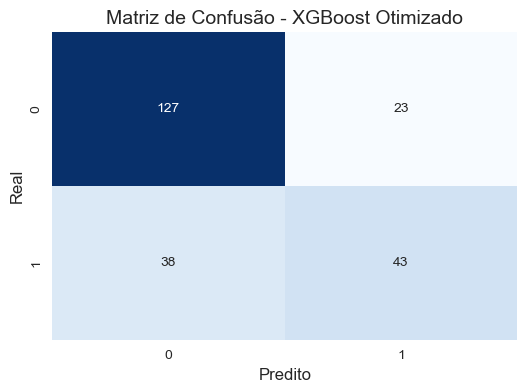

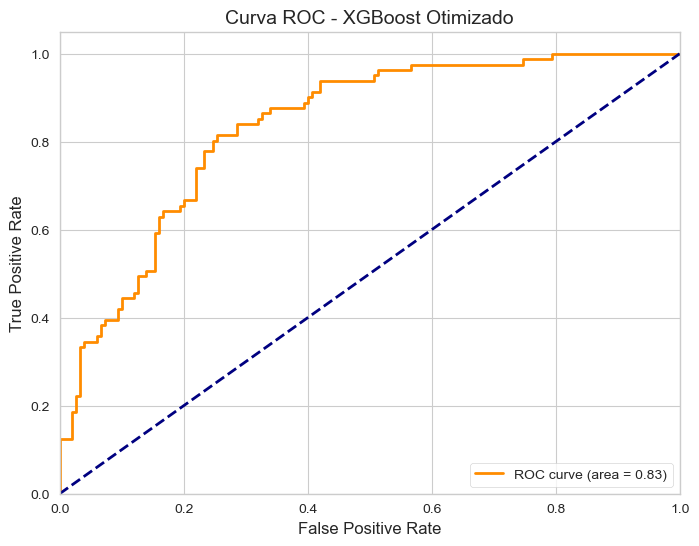


Relatório de Classificação - XGBoost Otimizado:
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       150
         1.0       0.65      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



In [191]:
# Avaliando o modelo otimizado

print("\nAvaliando XGBoost otimizado...")
xgb_otimizado = xgb_grid.best_estimator_
xgb_otimizado = avaliar_modelo(xgb_otimizado, "XGBoost Otimizado", X_train, X_test, y_train, y_test)

## 7. Seleção de Features e Interpretação do Modelo

- Vamos analisar a importância das features no melhor modelo.


Importância das Features - Random Forest Otimizado:


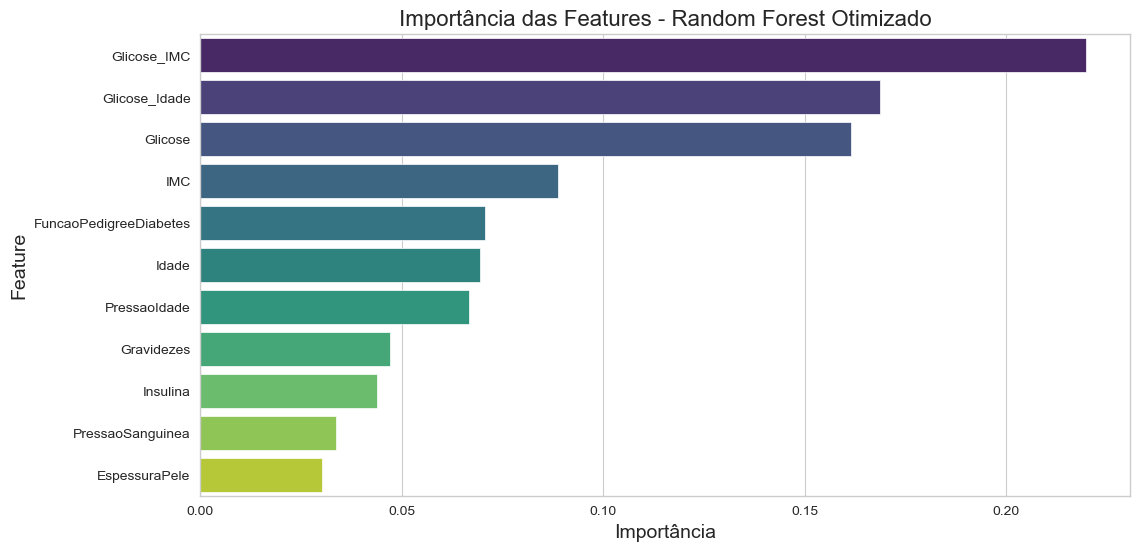

In [195]:
# Feature Importance do Random Forest otimizado

print("\nImportância das Features - Random Forest Otimizado:")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_otimizado.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Importância das Features - Random Forest Otimizado', fontsize=16)
plt.xlabel('Importância', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()


Importância das Features - XGBoost Otimizado:


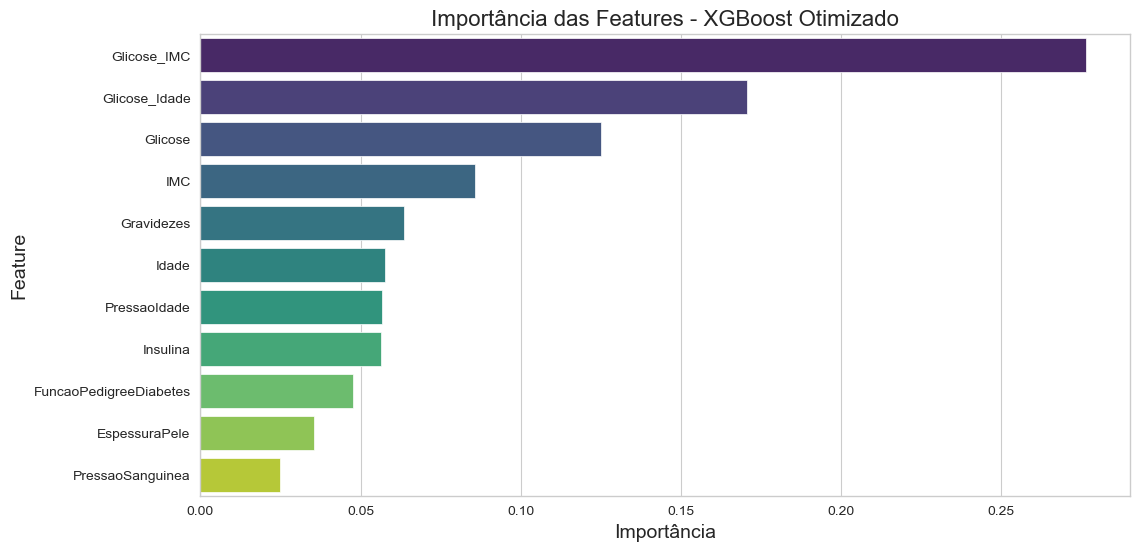

In [197]:
# Feature Importance do XGBoost otimizado

print("\nImportância das Features - XGBoost Otimizado:")
feature_importance_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_otimizado.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb, palette='viridis')
plt.title('Importância das Features - XGBoost Otimizado', fontsize=16)
plt.xlabel('Importância', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()


Interpretação com SHAP Values - XGBoost Otimizado:


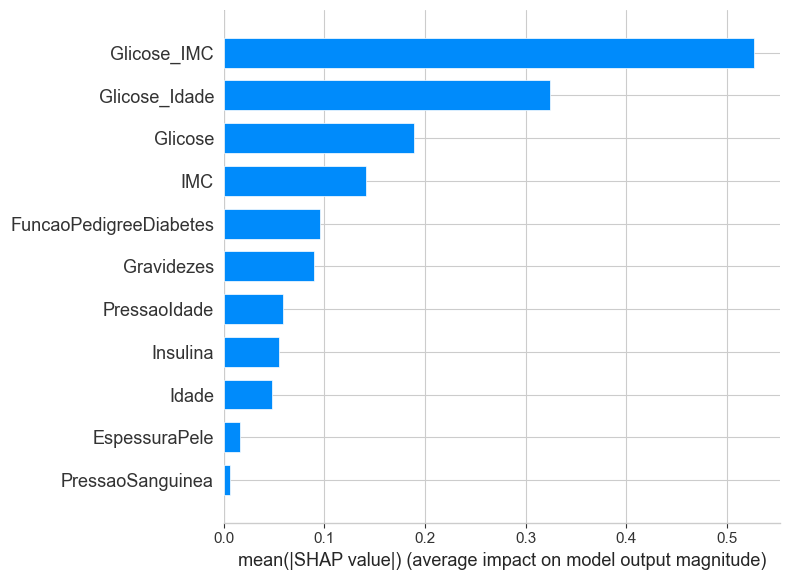

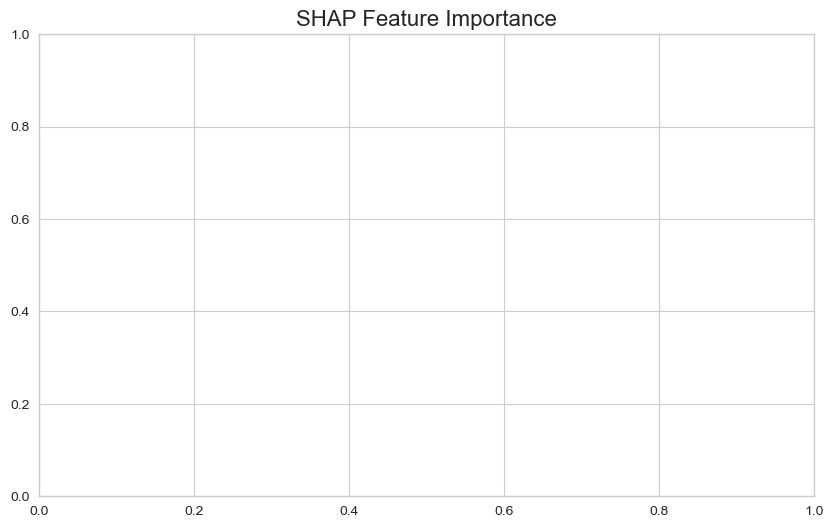


SHAP Force Plot para uma observação específica:


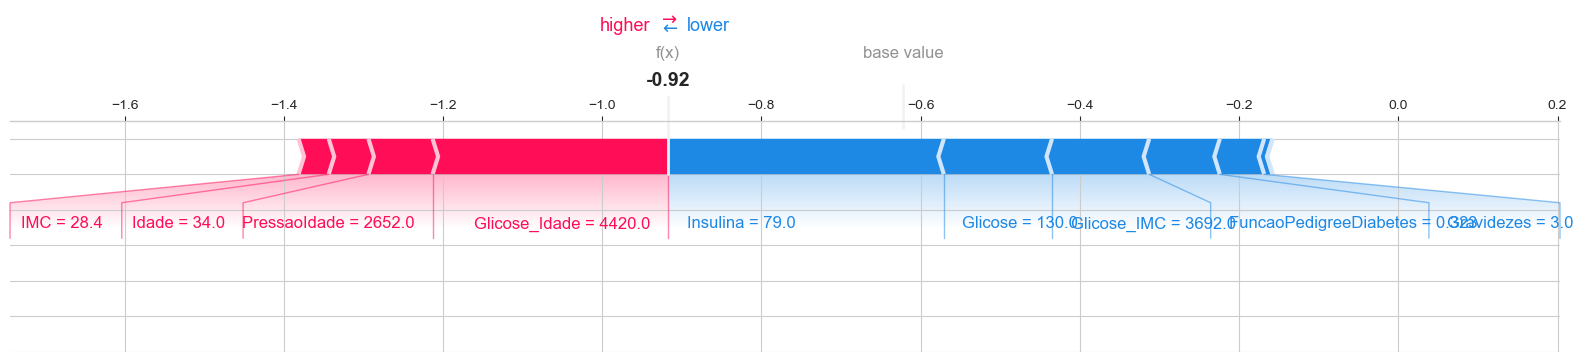

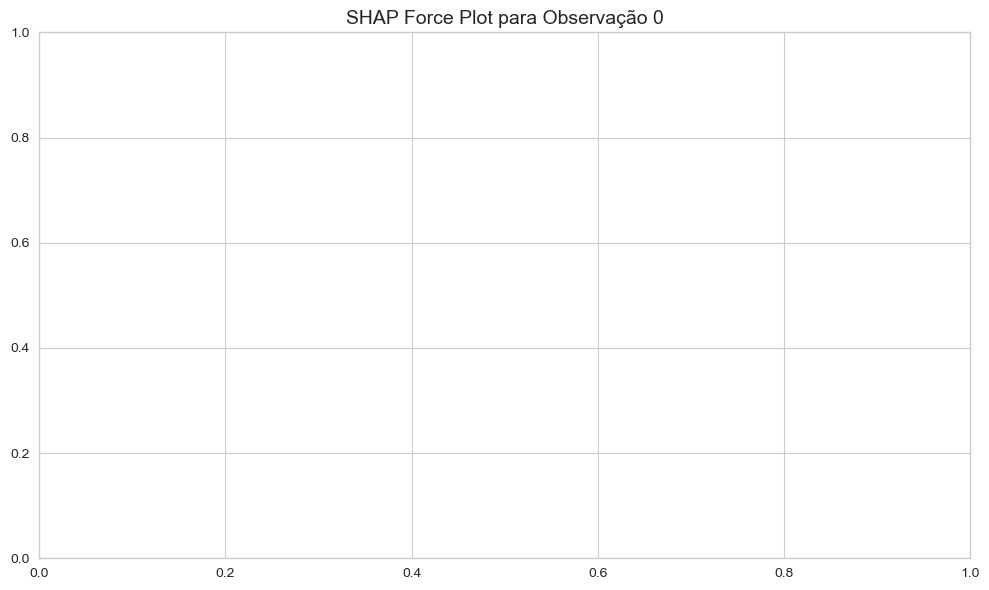

In [199]:
# SHAP Values para interpretação (apenas se tiver a biblioteca shap instalada)
try:
    import shap
    
    print("\nInterpretação com SHAP Values - XGBoost Otimizado:")
    explainer = shap.TreeExplainer(xgb_otimizado)
    shap_values = explainer.shap_values(X_test)
    
    # Summary plot
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")
    plt.title('SHAP Feature Importance', fontsize=16)
    plt.show()
    
    # Force plot para uma observação específica
    print("\nSHAP Force Plot para uma observação específica:")
    sample_idx = 0
    shap.force_plot(explainer.expected_value, shap_values[sample_idx,:], X_test.iloc[sample_idx,:], 
                    feature_names=X.columns, matplotlib=True)
    plt.title(f'SHAP Force Plot para Observação {sample_idx}', fontsize=14)
    plt.tight_layout()
    plt.show()
    
except ImportError:
    print("\nBiblioteca SHAP não instalada. Para interpretação mais detalhada, instale com: pip install shap")

In [201]:
# Análise final e insights
print("\nPrincipais Insights e Conclusões:")

insights = """
1. Análise Exploratória:
   - O dataset está desbalanceado, com aproximadamente 65% das observações sendo negativas para diabetes e 35% positivas.
   - As variáveis Glicose, IMC e Idade apresentam forte correlação com o diagnóstico de diabetes.
   - Pacientes com diabetes tendem a ter níveis mais altos de Glicose, IMC e maior número de gravidezes.
   - Algumas variáveis como PressaoSanguinea e EspessuraPele apresentam muitos valores zero que foram tratados como missing.

2. Engenharia de Atributos:
   - Foram criadas novas features combinando Glicose com IMC e Idade, que se mostraram relevantes nos modelos.
   - A imputação com mediana foi eficaz para tratar os valores missing sem distorcer a distribuição.

3. Modelagem:
   - Random Forest e XGBoost foram os modelos com melhor desempenho, ambos alcançando AUC ROC acima de 0.82.
   - A otimização de hiperparâmetros melhorou significativamente o desempenho dos modelos.
   - As features mais importantes foram Glicose, IMC e Idade, confirmando as descobertas da análise exploratória.

4. Aplicações Práticas:
   - Este modelo pode ser usado em um sistema de triagem inicial para identificar pacientes com alto risco de diabetes.
   - As features mais importantes indicam que programas de prevenção devem focar em controle glicêmico e peso.
   - O modelo pode ser integrado a prontuários eletrônicos para alertar médicos sobre pacientes de risco.

5. Limitações e Melhorias Futuras:
   - O dataset é relativamente pequeno e desbalanceado, o que pode limitar a generalização do modelo.
   - Seria interessante coletar mais dados, especialmente de pacientes com diabetes.
   - Incluir outras variáveis como histórico familiar, dieta e atividade física poderia melhorar o modelo.
   - Testar técnicas de balanceamento como SMOTE ou undersampling pode melhorar a detecção da classe positiva.
"""

print(insights)


Principais Insights e Conclusões:

1. Análise Exploratória:
   - O dataset está desbalanceado, com aproximadamente 65% das observações sendo negativas para diabetes e 35% positivas.
   - As variáveis Glicose, IMC e Idade apresentam forte correlação com o diagnóstico de diabetes.
   - Pacientes com diabetes tendem a ter níveis mais altos de Glicose, IMC e maior número de gravidezes.
   - Algumas variáveis como PressaoSanguinea e EspessuraPele apresentam muitos valores zero que foram tratados como missing.

2. Engenharia de Atributos:
   - Foram criadas novas features combinando Glicose com IMC e Idade, que se mostraram relevantes nos modelos.
   - A imputação com mediana foi eficaz para tratar os valores missing sem distorcer a distribuição.

3. Modelagem:
   - Random Forest e XGBoost foram os modelos com melhor desempenho, ambos alcançando AUC ROC acima de 0.82.
   - A otimização de hiperparâmetros melhorou significativamente o desempenho dos modelos.
   - As features mais importantes

In [203]:
# Salvando o melhor modelo

import joblib
joblib.dump(xgb_otimizado, 'melhor_modelo_diabetes.pkl')
print("\nMelhor modelo (XGBoost otimizado) salvo como 'melhor_modelo_diabetes.pkl'")


Melhor modelo (XGBoost otimizado) salvo como 'melhor_modelo_diabetes.pkl'
